## Loading Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,LabelBinarizer,MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('onlinefoods.csv')
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [3]:
print("Basic information about the dataset:")
df.info()

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dty

## Exploratory Data Analysis

In [4]:
print("Descriptive statistics:")
df.describe()

Descriptive statistics:


,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [5]:
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

Histograms for numeric features:


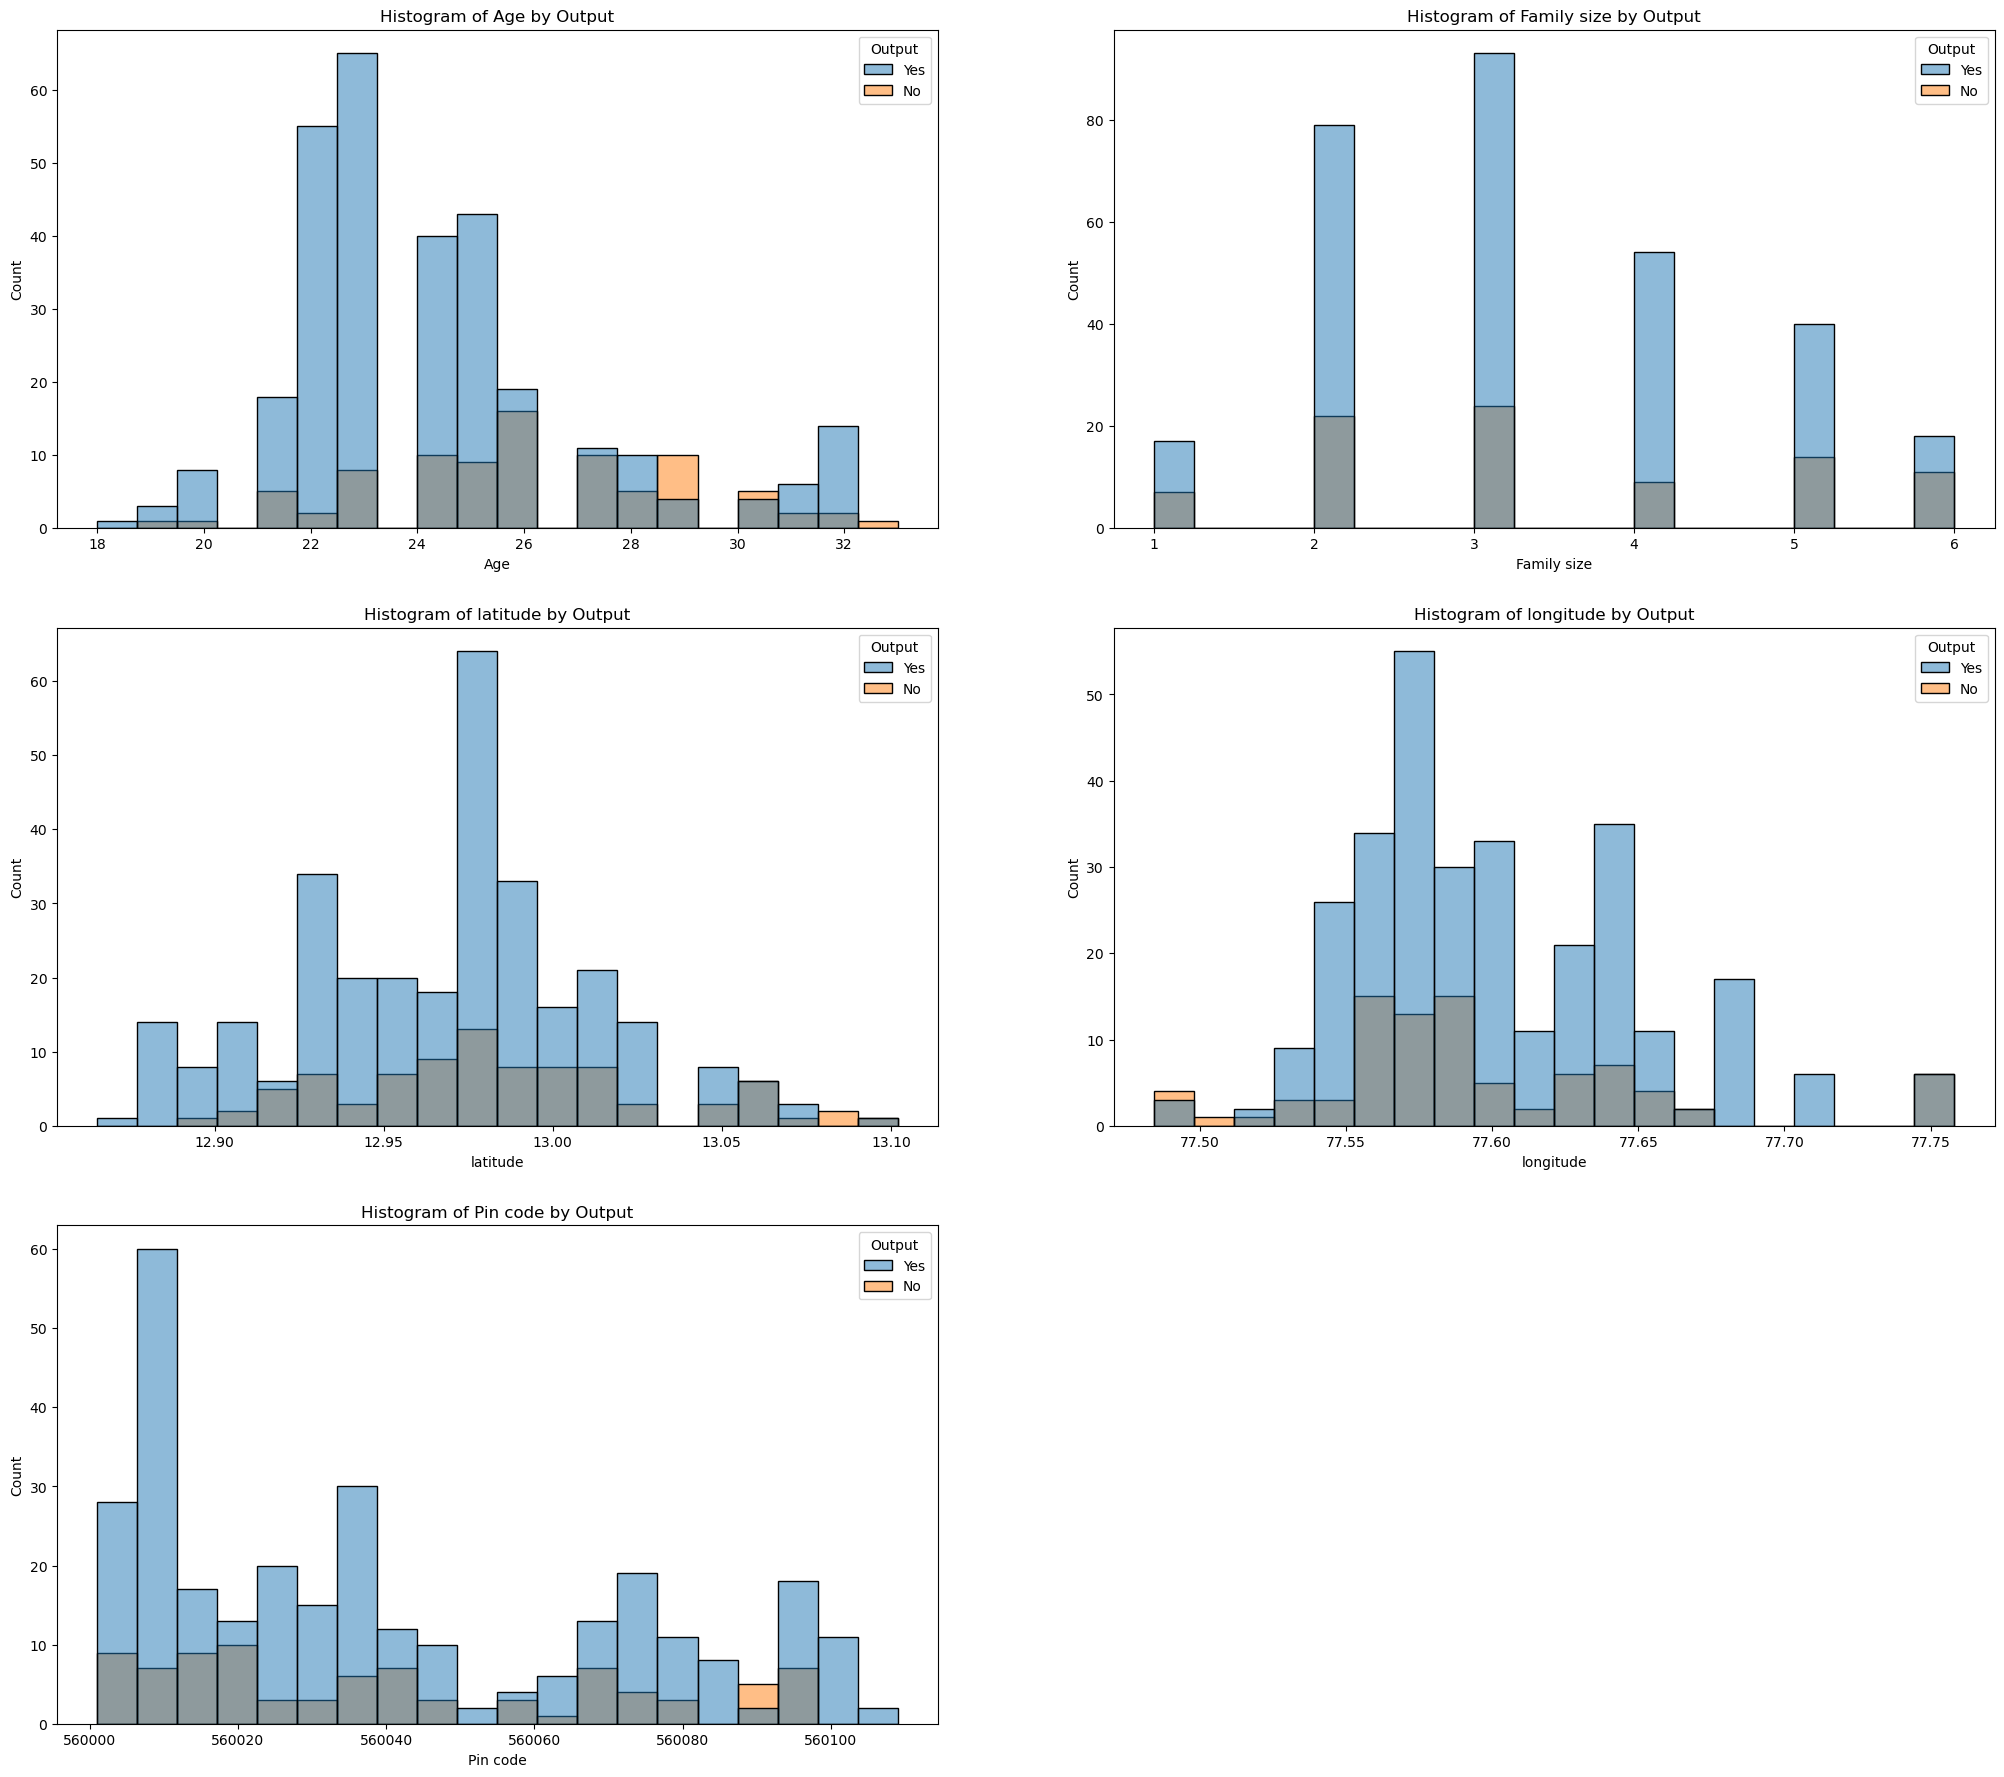

In [6]:
print("Histograms for numeric features:")

plt.figure(figsize=(25,22))

for i, col in enumerate(df.select_dtypes(include=['int64','float64'])):
    plt.subplot(3,2,i + 1)
    sns.histplot(data=df, x=col, hue='Output', bins=20)
    plt.title(f'Histogram of {col} by Output')
    plt.xlabel(col)
    plt.ylabel('Count')

#### Observations:

1. **Age**: Younger ages, particularly around 20-25, tend to order me. The 'No' outcome is more evenly distributed across ages but is less frequent.

2. **Latitude**: There's a wide distribution for both 'Yes' and 'No' outcomes without a clear pattern that relates latitude to outcomes.

3. **Family Size**: Small family sizes (1-2 members) have more 'Yes' outcomes. Larger family sizes have a higher proportion of 'No' outcomes.

4. **Longitude**: Similar to latitude, both 'Yes' and 'No' outcomes are distributed across the range of longitudes without a clear pattern.

5. **Pin Code**: Certain pin codes have a higher frequency of 'Yes' outcomes, indicating a possible geographical pattern in the data related to these outcomes.

Box plot for numerical features:


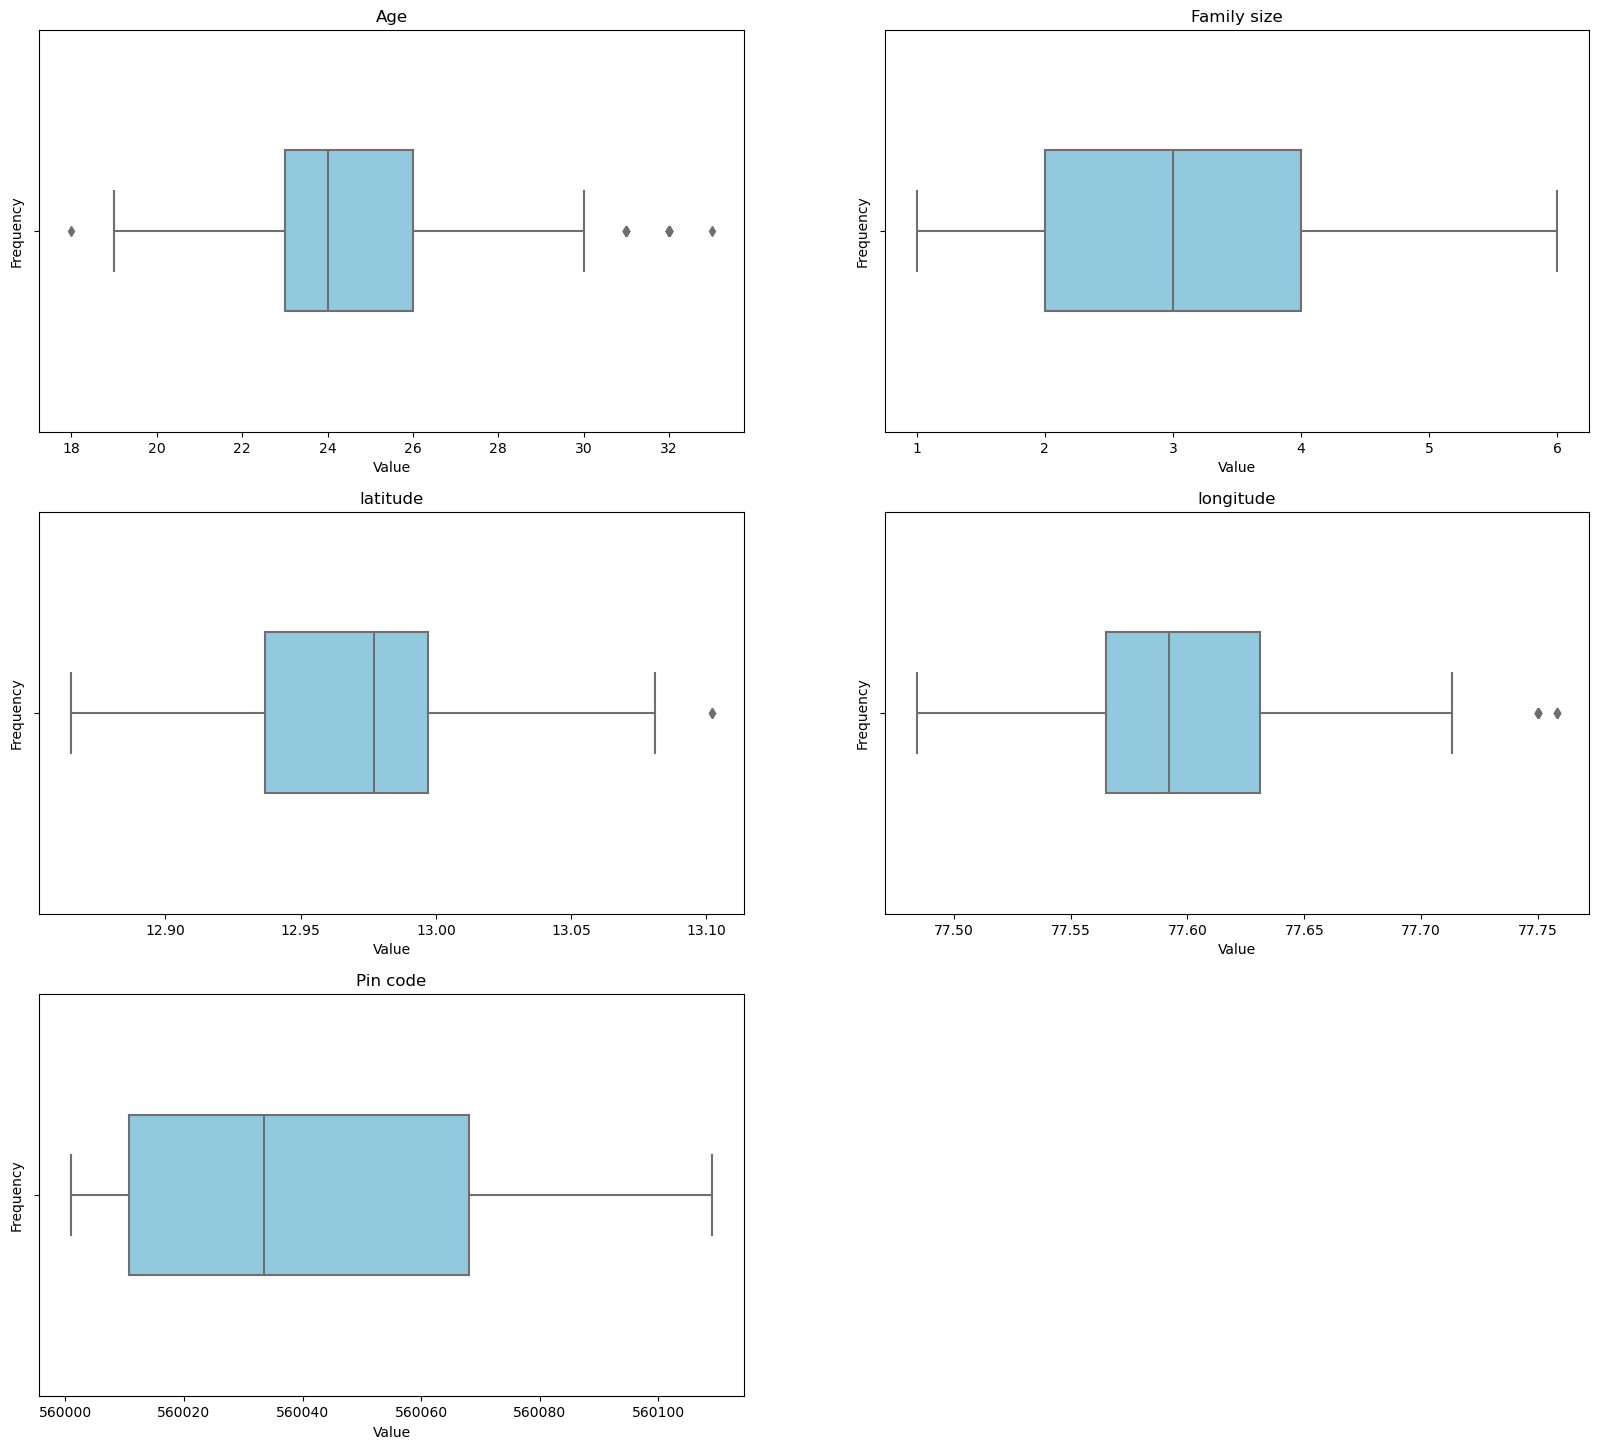

In [7]:
print("Box plot for numerical features:")
plt.figure(figsize=(20,24))
numeric_features = df.select_dtypes(include=['float64','int64']).columns
for i, column in enumerate(numeric_features):
    plt.subplot(4,2,i + 1)
    sns.boxplot(x=df[column], color='skyblue', width=0.4)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

#### Observations:

Most numerical features have a uniform distribution, except Age, Latitude, and Longitude that have a few outliers (although the latter two would not be as important in building our model)

Count plot for categorical features:


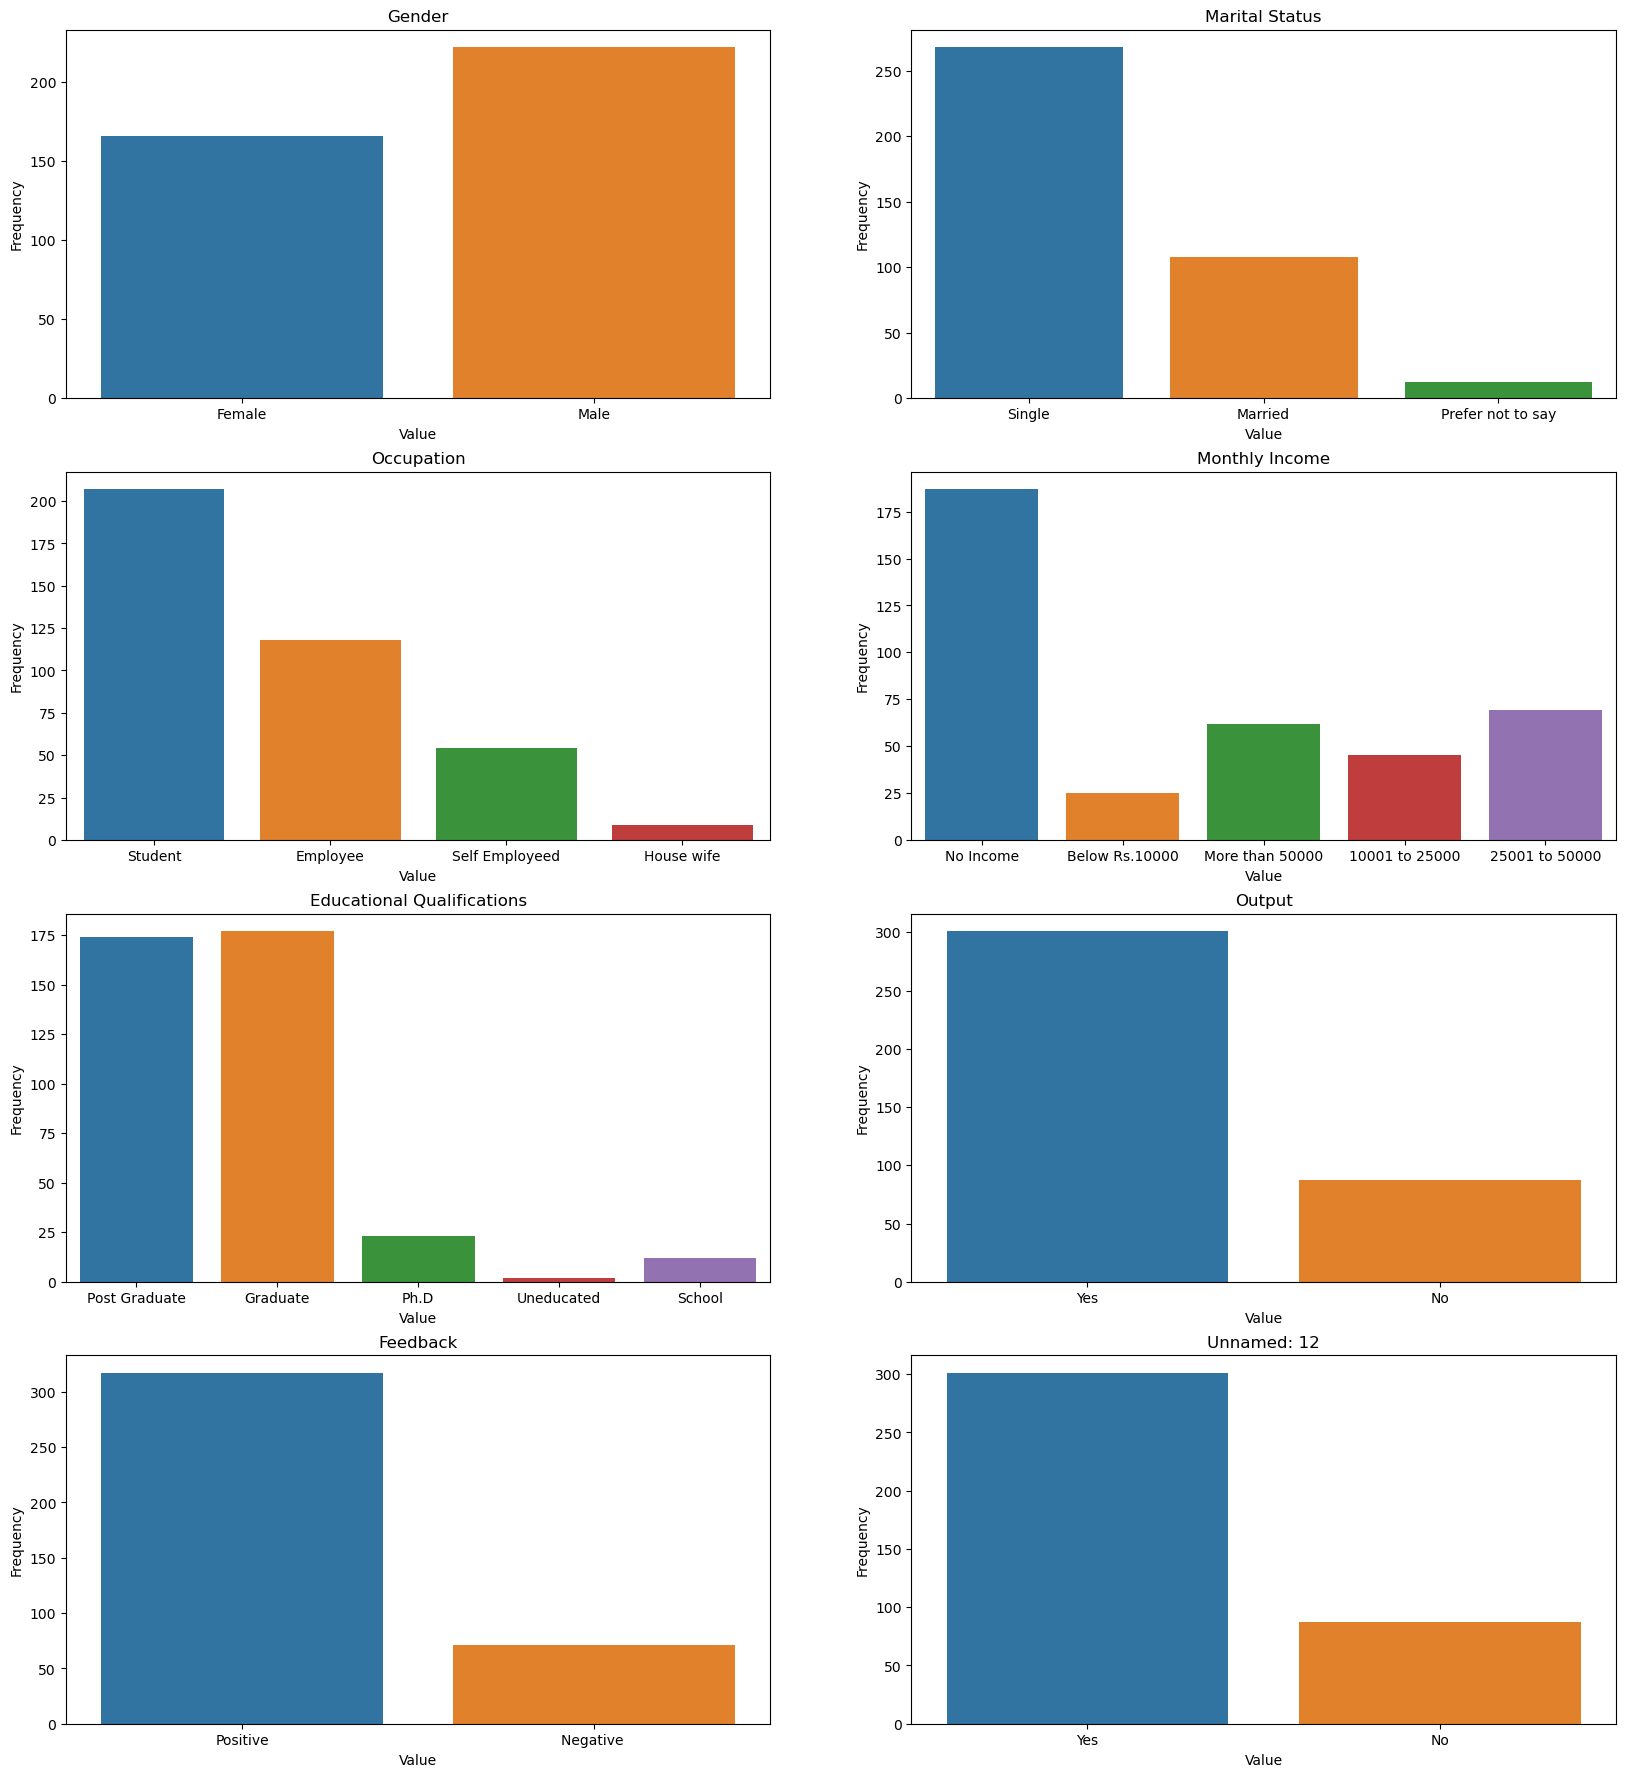

In [8]:
print("Count plot for categorical features:")
plt.figure(figsize=(20,22))
categorical_features = df.select_dtypes(include=['object']).columns
for i,column in enumerate(categorical_features):
    plt.subplot(4,2,i + 1)
    sns.countplot(x= df[column],data=df)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

#### Observation:

1. **Gender**: There are more male participants than female.
2. **Marital Status**: Single individuals form the majority, followed by married, with a few preferring not to say.
3. **Occupation**: Students are the most common occupation, followed by employees, with housewives and self-employed individuals being less common.
4. **Educational Qualifications**: Graduates dominate the sample, with postgraduates next, and fewer participants only having school-level education or holding a Ph.D.
5. **Monthly Income**: A substantial portion of the sample has a monthly income below 10,000, with each subsequent higher income bracket being less represented.
6. **Output**: There is a significant imbalance with 'No' being the predominant response.
7. **Feedback**: Positive feedback outnumbers negative feedback, with 'value' (perhaps indicating neutral or no feedback) being the least common.
8. **Unknown 12**: A majority responded 'Yes' to an unspecified question or category labeled "Unknown 12". But since we don't know much about this column, we would need to drop this

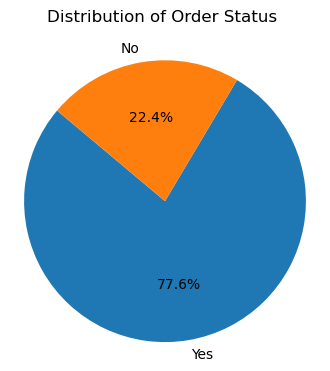

In [9]:
plt.figure(figsize=(4, 4))
output_counts = df['Output'].value_counts()
plt.pie(output_counts, labels=output_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Distribution of Order Status \n')
plt.ylabel('')

plt.show()

#### Observation:

The target column looks imbalanced - accuracy would not be a good metric to evaluate the model and we would need to apply balancing techniques

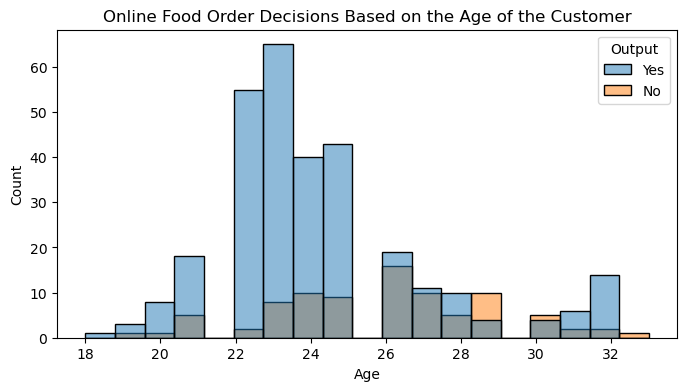

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(x="Age", hue="Output", data=df)
plt.title("Online Food Order Decisions Based on the Age of the Customer")
plt.show()

#### Observation:

The histogram indicates that customers aged 20 to 30 are more likely to order food online, with the highest frequency at around 23 years old, while customers aged 28 and above are increasingly less likely to order online.

Observing independent variables based on the Output:


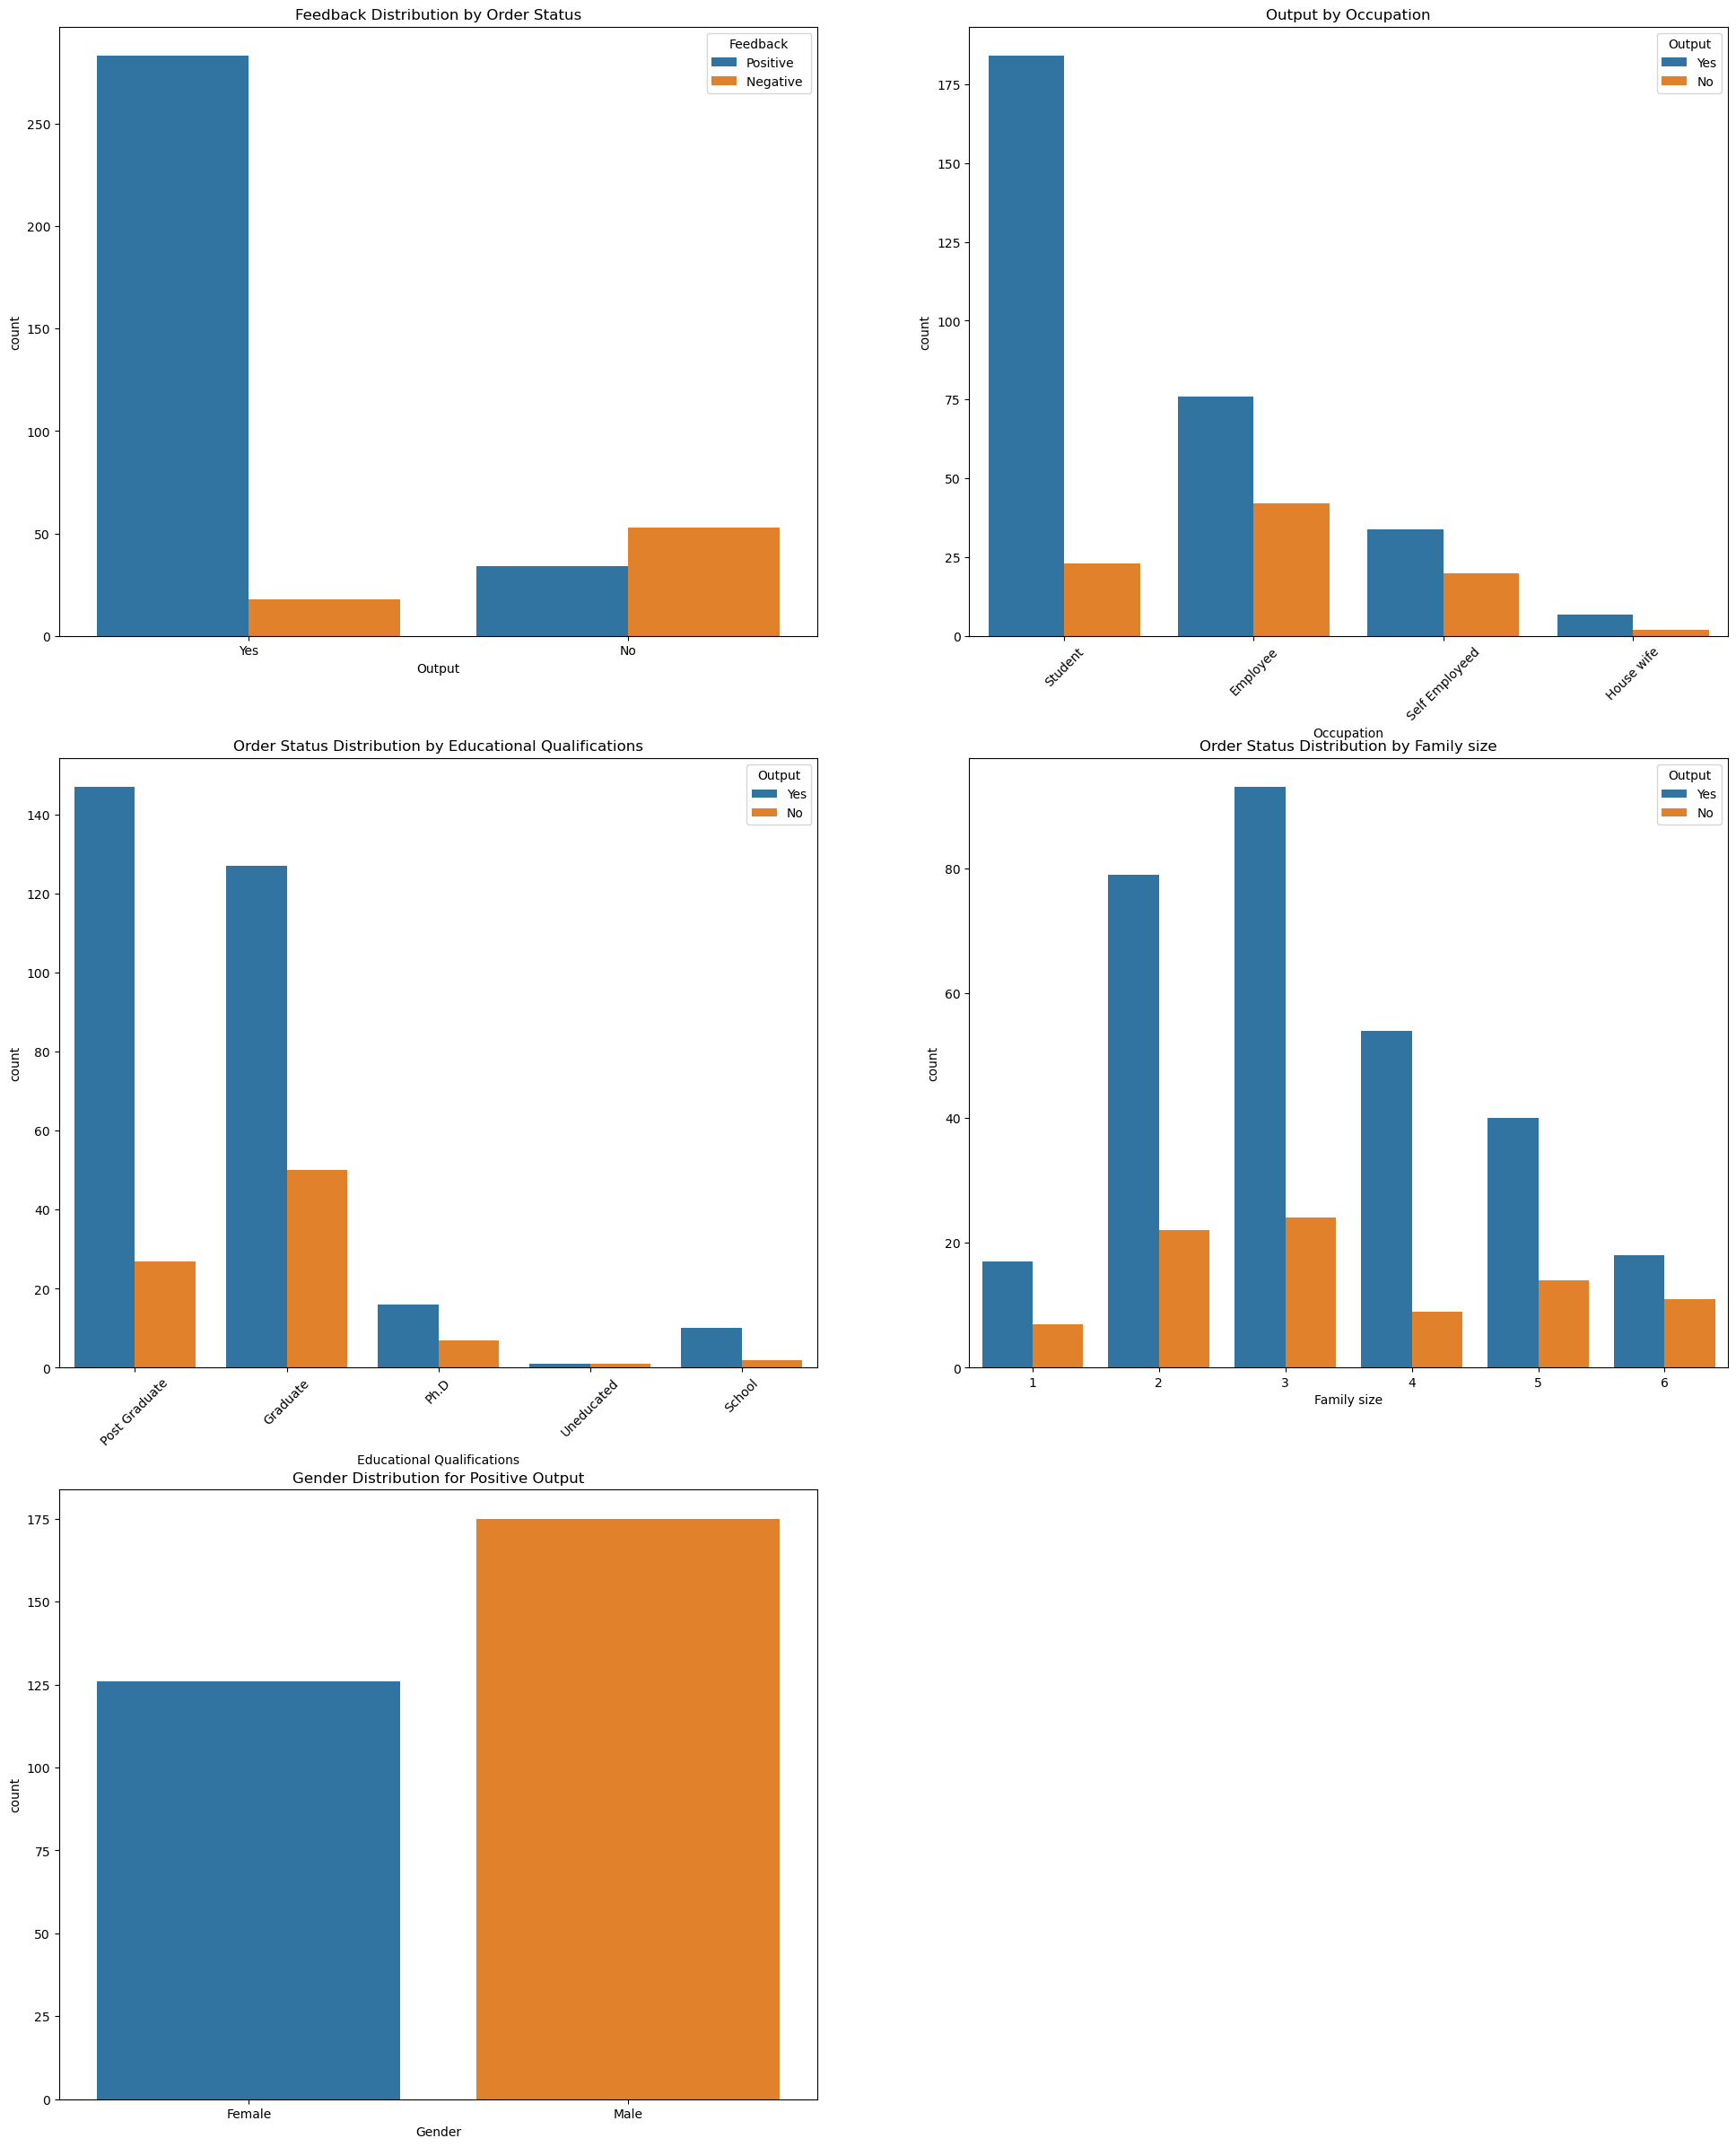

In [11]:
print("Observing independent variables based on the Output:")

fig, axes = plt.subplots(3, 2, figsize=(24,30))

sns.countplot(x='Output', hue='Feedback', data=df, ax=axes[0,0])
axes[0,0].set_title('Feedback Distribution by Order Status')

sns.countplot(data=df, x='Occupation', hue='Output', ax=axes[0,1])
axes[0,1].set_title('Output by Occupation')
axes[0,1].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='Educational Qualifications', hue='Output', ax=axes[1,0])
axes[1,0].set_title('Order Status Distribution by Educational Qualifications')
axes[1,0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='Family size', hue='Output', ax=axes[1,1])
axes[1,1].set_title('Order Status Distribution by Family size')

sns.countplot(x='Gender', data=df[df['Output'] == 'Yes'], ax=axes[2,0])
axes[2,0].set_title('Gender Distribution for Positive Output')

axes[2,1].axis('off')
plt.show()

#### Observations:

1. **Feedback Distribution by Order Status**: The majority of orders have positive feedback; negative feedback is less common.
2. **Output by Occupation**: Unemployed individuals have a higher rate of 'No' outcomes, whereas students have a more balanced distribution of 'Yes' and 'No' outcomes.
3. **Order Status Distribution by Educational Qualifications**: Individuals with a school-level education predominantly have 'No' outcomes, while postgraduates show a balance between 'Yes' and 'No' outcomes.
4. **Order Status Distribution by Family size**: Larger families tend to have more 'No' outcomes compared to smaller families.
5. **Gender Distribution by Order Output**: Male and female participants have a similar distribution of 'Yes' and 'No' outcomes, with 'No' being slightly more frequent in both groups.

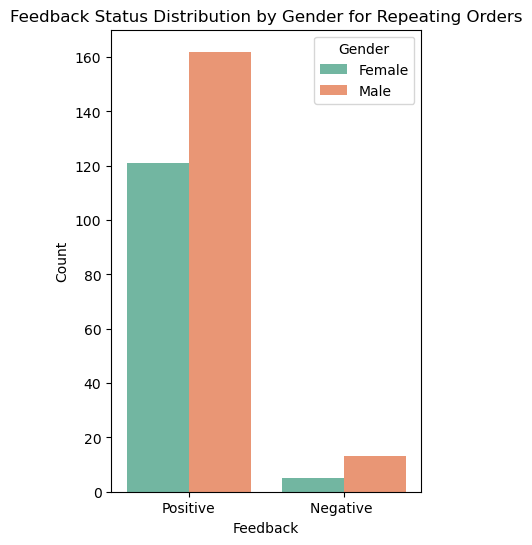

In [12]:
repeating_orders = df[df['Output'] == 'Yes']

plt.figure(figsize=(4, 6))
sns.countplot(data=repeating_orders, x='Feedback', hue='Gender', palette='Set2')

plt.title('Feedback Status Distribution by Gender for Repeating Orders')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

#### Observation:

There are more positive feedback reviews for both men and women who have repeat orders

## Feature Engineering

In [13]:
df = df.drop(['Unnamed: 12'], axis=1)
categorical_features = list(categorical_features)
categorical_features.remove('Unnamed: 12')

In [14]:
print("Observing the categorical column disribution before encoding: \n")
for columns in categorical_features:
    print(columns,'\n')
    print(df[columns].value_counts(),'\n')

Observing the categorical column disribution before encoding: 

Gender 

Male      222
Female    166
Name: Gender, dtype: int64 

Marital Status 

Single               268
Married              108
Prefer not to say     12
Name: Marital Status, dtype: int64 

Occupation 

Student           207
Employee          118
Self Employeed     54
House wife          9
Name: Occupation, dtype: int64 

Monthly Income 

No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: Monthly Income, dtype: int64 

Educational Qualifications 

Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: Educational Qualifications, dtype: int64 

Output 

Yes    301
No      87
Name: Output, dtype: int64 

Feedback 

Positive     317
Negative      71
Name: Feedback, dtype: int64 



In [15]:
encoder = LabelEncoder()

for columns in categorical_features:
    df[columns] = encoder.fit_transform(df[columns])

print("Observing the categorical column disribution after encoding: \n")    
for columns in categorical_features:
    print(columns,'\n')
    print(df[columns].value_counts(),'\n')

Observing the categorical column disribution after encoding: 

Gender 

1    222
0    166
Name: Gender, dtype: int64 

Marital Status 

2    268
0    108
1     12
Name: Marital Status, dtype: int64 

Occupation 

3    207
0    118
2     54
1      9
Name: Occupation, dtype: int64 

Monthly Income 

4    187
1     69
3     62
0     45
2     25
Name: Monthly Income, dtype: int64 

Educational Qualifications 

0    177
2    174
1     23
3     12
4      2
Name: Educational Qualifications, dtype: int64 

Output 

1    301
0     87
Name: Output, dtype: int64 

Feedback 

1    317
0     71
Name: Feedback, dtype: int64 



In [16]:
cols_drop = ['Output','latitude','longitude','Pin code']
X = df.drop(cols_drop, axis=1)
y = df['Output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train[['Age']])
    
X_train['Age'] = scaler.transform(X_train[['Age']])
X_test['Age'] = scaler.transform(X_test[['Age']])

## Modeling

In [17]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

lb = LabelBinarizer()
lb.fit(y_train)

for name, model in models.items():
    print(f"Model: {name}")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred),'\n')
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred),'\n')
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {accuracy} \n")

    f1 = f1_score(lb.transform(y_test), lb.transform(y_pred), pos_label=1)
    print(f"F1 Score: {f1}")
    
    roc_auc = roc_auc_score(lb.transform(y_test), model.predict_proba(X_test)[:, 1])
    print(f"ROC AUC Score: {roc_auc}")
    
    print("-" * 50,'\n')

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.63      0.55      0.59        22
           1       0.90      0.93      0.91        95

    accuracy                           0.85       117
   macro avg       0.76      0.74      0.75       117
weighted avg       0.85      0.85      0.85       117
 

Confusion Matrix:
[[12 10]
 [ 7 88]] 

Accuracy Score: 0.8547008547008547 

F1 Score: 0.911917098445596
ROC AUC Score: 0.8574162679425837
-------------------------------------------------- 

Model: Random Forest
              precision    recall  f1-score   support

           0       0.76      0.59      0.67        22
           1       0.91      0.96      0.93        95

    accuracy                           0.89       117
   macro avg       0.84      0.77      0.80       117
weighted avg       0.88      0.89      0.88       117
 

Confusion Matrix:
[[13  9]
 [ 4 91]] 

Accuracy Score: 0.8888888888888888 

F1 Score: 0.933333333333333

### Logistic Regression:

Precision for predicting "Yes" (0.90) is higher than for predicting "No" (0.63),indicating that the model is better at correctly identifying positive cases.

Recall for predicting "Yes" (0.93) is higher than for predicting "No" (0.55),indicating that the model is better at capturing actual positive cases.

F1-score for predicting "Yes" (0.91) is high,indicating a good balance between precision and recall for positive cases.

ROC AUC score (0.857) is also quite good,indicating that the model performs well in distinguishing between positive and negative cases.

### Random Forest:

Precision,recall,and F1-score for predicting "Yes" are all high (0.91,0.96,0.93 respectively),indicating that the model performs well in identifying positive cases.

Precision,recall,and F1-score for predicting "No" are lower compared to Logistic Regression,indicating that the model is not as good at predicting negative cases.

ROC AUC score (0.913) is higher than Logistic Regression,indicating better overall performance in distinguishing between positive and negative cases.

### K-Nearest Neighbors:

Precision,recall,and F1-score for predicting "Yes" are high (0.92,0.95,0.93 respectively),similar to Random Forest.

Precision,recall,and F1-score for predicting "No" are lower compared to Logistic Regression and Random Forest.

ROC AUC score (0.839) is lower than both Logistic Regression and Random Forest,indicating that the model is not as effective in distinguishing between positive and negative cases.

### Overall:

Random Forest has the highest F1-score and ROC AUC score,indicating better overall performance among the three models.

Logistic Regression performs reasonably well but is outperformed by Random Forest in most metrics.

K-Nearest Neighbors lags behind the other two models,particularly in distinguishing between positive and negative cases (ROC AUC score).